In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
#read csv file into og (original gangster)
og = pd.read_csv(r"C:\Users\Matt\Desktop\SP.csv")

In [7]:
#look at the volume of days in set
len(og)

7559

In [8]:
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/1989,277.720001,277.720001,273.809998,275.309998,275.309998,128500000
1,1/4/1989,275.309998,279.750000,275.309998,279.429993,279.429993,149700000
2,1/5/1989,279.429993,281.510010,279.429993,280.010010,280.010010,174040000
3,1/6/1989,280.010010,282.059998,280.010010,280.670013,280.670013,161330000
4,1/9/1989,280.670013,281.890015,280.320007,280.980011,280.980011,163180000


In [9]:
#convert the year, month and day into their own columns for groupings
og.Date = pd.to_datetime(og.Date)
og['year'] = og.Date.dt.year
og['month'] = og.Date.dt.month
og['day'] = og.Date.dt.day



In [10]:
#check the new columns
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,1,3
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,1,4
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,1,5
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,1,6
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,1,9


In [11]:
#Create column that shows the absolute daily percentage change
og['change'] = (((og.Close - og.Close.shift(1))/og['Close']).abs())

In [12]:
#test that change went through
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,1,3,NaN
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,1,4,0.014744
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,1,5,0.002071
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,1,6,0.002352
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,1,9,0.001103


In [13]:
#my brain is asking to see the month names when analyzing 

og['month'] = og['month'].map({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                              7: 'July', 8: 'Aug', 9: 'Sep', 
                               10: 'Oct', 11: 'Nov', 12: 'Dec',})

In [14]:
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,Jan,3,NaN
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,Jan,4,0.014744
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,Jan,5,0.002071
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,Jan,6,0.002352
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,Jan,9,0.001103


In [15]:
og = og.dropna(how='any',axis=0) 

In [16]:
#look at basic statistics on the change column
og.change.describe()

count    7558.000000
mean        0.007401
std         0.008159
min         0.000000
25%         0.002141
50%         0.005002
75%         0.009911
max         0.103782
Name: change, dtype: float64

In [17]:
#groupby monthly change and sort order by mean of change
change_mean = og.groupby(['month']).change.mean()
change_mean = change_mean.sort_values(ascending = False)
change_mean

month
Oct      0.009036
Sep      0.007748
Nov      0.007694
Jan      0.007484
March    0.007451
Aug      0.007367
Feb      0.007293
April    0.007237
July     0.006991
Dec      0.006907
May      0.006835
June     0.006708
Name: change, dtype: float64

In [18]:
#groupby monthly change and sort order by std of change
change_std = og.groupby(['month']).change.std()
change_std = change_std.sort_values(ascending = False)
change_std

month
Oct      0.011572
Sep      0.009291
Nov      0.009260
Aug      0.008719
March    0.008109
Dec      0.007816
Jan      0.007461
Feb      0.007088
April    0.007061
July     0.006849
May      0.006379
June     0.006285
Name: change, dtype: float64

In [19]:
change_mean.describe()

count    12.000000
mean      0.007396
std       0.000614
min       0.006708
25%       0.006970
50%       0.007330
75%       0.007537
max       0.009036
Name: change, dtype: float64

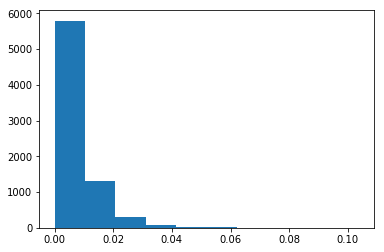

In [19]:
#maybe some outliers are skewing these means
#look at a histogram of the change column
plt.hist(og.change);

In [20]:
#create function to remove some of the major outliers in the dataset and sort by year
#created a function where the user sets how many standard deviations
#from the mean in column change to remove from dataframe and what years to include in the set

def custom_df(df, deviations, start_year, end_year):
    std = df.change.std()
    meany = df.change.mean()
    away = (std * deviations) + meany
    df = df[(df['change'] < away)]
    df = df[(df['year'] >= start_year)]
    df = df[(df['year'] <= end_year)]
    return df
    

In [21]:
#create new dataframe with function
new_df = custom_df(og, 5, 2015, 2020)

In [22]:
#look at how many days are in our new dataframe
len(new_df)

1006

In [23]:
#look at tail to ensure function is including right days
new_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
7554,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,2018,Dec,24,0.027868
7555,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,2018,Dec,26,0.047250
7556,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,2018,Dec,27,0.008490
7557,2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,2018,Dec,28,0.001243
7558,2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000,2018,Dec,31,0.008421


In [24]:
#look at head to ensure function is including the correct starting days
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
6553,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,2015,Jan,2,0.000340
6554,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,2015,Jan,5,0.018618
6555,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,2015,Jan,6,0.008973
6556,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,2015,Jan,7,0.011496
6557,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,2015,Jan,8,0.017574


In [25]:
#groupby month for the means of the change column and sort by the values with least volatile months first
customized = new_df.groupby(['month']).change.mean().sort_values(ascending = True)
customized

month
July     0.004180
May      0.004662
June     0.005082
Aug      0.005319
April    0.005397
Nov      0.005591
Oct      0.005765
Sep      0.005803
March    0.006258
Feb      0.007382
Jan      0.007503
Dec      0.007601
Name: change, dtype: float64

In [26]:
#send groupby to a list
new_list = customized.index.tolist()

In [27]:
#show list
new_list

['July',
 'May',
 'June',
 'Aug',
 'April',
 'Nov',
 'Oct',
 'Sep',
 'March',
 'Feb',
 'Jan',
 'Dec']

In [67]:
#find the index of month in list
new_list.index('July') + 1 

1

In [71]:
#created a function which transforms a dataframe that 
#comprises of daily market data and includes
#the percent daily change ('change') and the month's name ('month')
#function will return 
#the average volatility rank for each month per year
#As an input, users define the
#dataframe (frame), the begining period (start_year), the ending period (end_year)


def rank_month(frame, start_year, end_year):
    the_year = start_year
    Jan = []
    Feb = []
    March = []
    April = []
    May = []
    June = []
    July = []
    Aug = []
    Sep = []
    Oct = []
    Nov = []
    Dec = []
    Period = []
    
    while the_year < end_year:
        df = frame[(frame['year'] == the_year)]
        months_grouped = df.groupby(['month']).change.mean().sort_values(ascending = True)
        new_list = months_grouped.index.tolist()
        Jan.append(new_list.index('Jan') + 1) 
        Feb.append(new_list.index('Feb') + 1)
        March.append(new_list.index('March') + 1)
        April.append(new_list.index('April') + 1)
        May.append(new_list.index('May') + 1)
        June.append(new_list.index('June') + 1)
        July.append(new_list.index('July') + 1)
        Aug.append(new_list.index('Aug') + 1)
        Sep.append(new_list.index('Sep') + 1)
        Oct.append(new_list.index('Oct') + 1)
        Nov.append(new_list.index('Nov') + 1)
        Dec.append(new_list.index('Dec') + 1)
        
        Period.append(the_year)
        
        the_year = the_year + 1  
    
    rank = [('Year', Period),
            ('Jan', Jan),
            ('Feb', Feb),
            ('March', March),
            ('April', April),
            ('May', May),
            ('June', June),
            ('July',July),
            ('Aug', Aug),
            ('Sep', Sep),
            ('Oct', Oct),
            ('Nov', Nov),
            ('Dec', Dec),
           ]
    df = pd.DataFrame.from_items(rank)
    
        
    return df

In [72]:
#create a new dataframe with function rank_month

new_found_df = rank_month(og, 1995, 2010)

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


In [73]:
#look at head of dataframe
new_found_df.head()

,Year,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1995,2,6,4,3,9,8,11,1,5,7,10,12
1,1996,9,10,8,5,7,1,12,6,2,3,4,11
2,1997,1,3,7,10,6,2,4,9,5,12,11,8
3,1998,8,2,1,4,3,5,7,11,12,10,6,9
4,1999,10,11,7,6,9,4,3,8,5,12,2,1


In [74]:
#look at the statistical characteristics of dataframe
details = new_found_df.describe()
details

,Year,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2002.000000,7.133333,6.466667,7.266667,6.666667,6.600000,4.600000,7.400000,6.133333,6.466667,7.866667,5.933333,5.466667
std,4.472136,3.563038,3.136574,3.514595,3.773340,2.823372,2.947154,3.018988,3.642344,3.248443,3.583029,3.575046,4.405624
min,1995.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,1998.500000,5.000000,4.000000,6.000000,3.500000,5.000000,2.500000,5.000000,3.500000,4.500000,5.500000,3.000000,1.000000
50%,2002.000000,8.000000,6.000000,7.000000,6.000000,7.000000,4.000000,7.000000,5.000000,6.000000,7.000000,5.000000,4.000000
75%,2005.500000,9.500000,9.500000,9.500000,9.500000,8.500000,6.000000,10.000000,9.500000,8.500000,11.000000,9.000000,9.500000
max,2009.000000,11.000000,11.000000,12.000000,12.000000,11.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000,12.000000


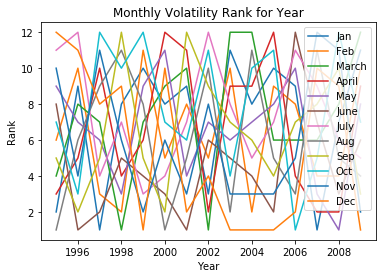

In [75]:
#plot the volatility as a line graph by period

new_found_df.plot(x="Year", y=["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.ylabel('Rank')
plt.title('Monthly Volatility Rank for Year')
plt.show()


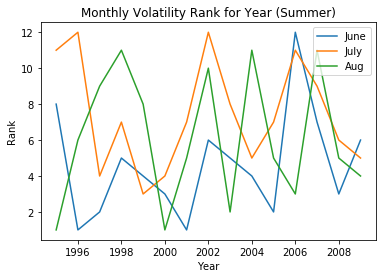

In [77]:
#plot just a few months in attempt to make more sense of data 

new_found_df.plot(x="Year", y=["June", "July", "Aug"])
plt.ylabel('Rank')
plt.title('Monthly Volatility Rank for Year (Summer)')
plt.show()

In [79]:
#create dataframe to chart the averages by month 
barchart_df = new_found_df.drop(columns=['Year'])

barchart_df = barchart_df.mean(axis=0)

barchart_df

Jan      7.133333
Feb      6.466667
March    7.266667
April    6.666667
May      6.600000
June     4.600000
July     7.400000
Aug      6.133333
Sep      6.466667
Oct      7.866667
Nov      5.933333
Dec      5.466667
dtype: float64

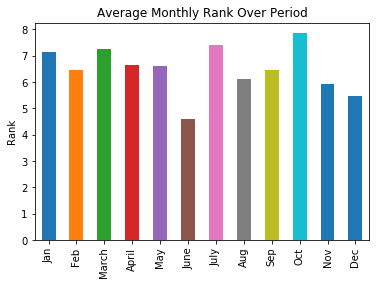

In [82]:
#chart the nmonthly averages

barchart_df.plot(kind='bar') 

plt.ylabel('Rank')
plt.title('Average Monthly Rank Over Period')


plt.show()

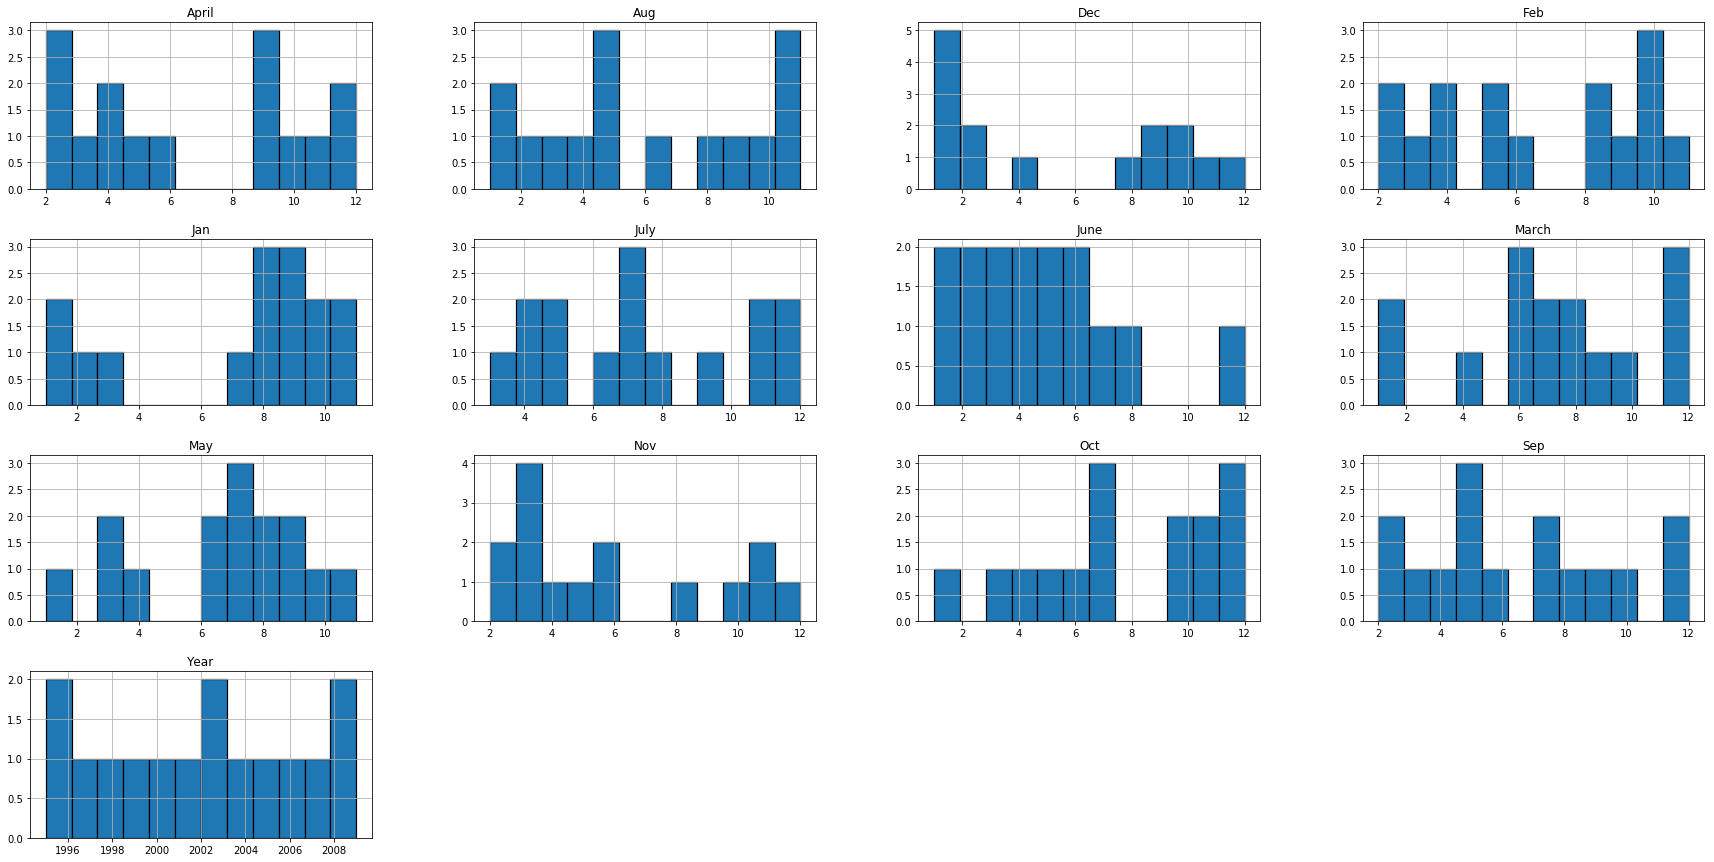

In [83]:
#plot histograms of the dataframe by month

new_found_df.hist(bins = 12, edgecolor='black', linewidth=1.2, figsize=(30,15) );

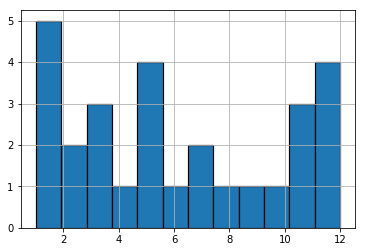

In [52]:
#plot individual month for better view 
new_found_df.Aug.hist(bins=12, edgecolor='black', linewidth=1.2);

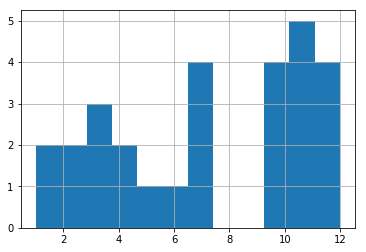

In [44]:
#plot individual month for better view 
new_found_df.Oct.hist(bins=12);

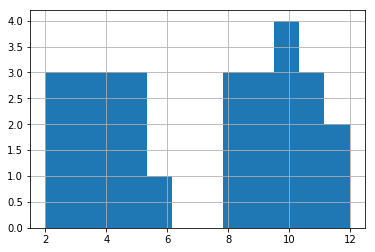

In [45]:
#plot individual month for better view 
new_found_df.Feb.hist(bins=12);